## image classification
architecture: CNN<br>
dataset: cifar-10<br>
lib: tensorflow<br>
source code: [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn)
some modification added.

In [77]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%matplotlib inline

In [3]:
# loading dataset
(train_img, train_label), (test_img, test_label) = datasets.cifar10.load_data()

In [4]:
# normalization
train_img = train_img/np.max(train_img)
test_img = test_img/np.max(test_img)
np.max(train_img), np.max(test_img)

(1.0, 1.0)

In [5]:
# dataset check
train_img.shape, train_label.shape, test_img.shape, test_label.shape
train_img.dtype, train_label.dtype

(dtype('float64'), dtype('uint8'))

In [6]:
classes = np.unique(train_label)
number_of_classes = len(classes)
print("number of classes is %d" % number_of_classes)
print("output classes: ", classes)

number of classes is 10
output classes:  [0 1 2 3 4 5 6 7 8 9]


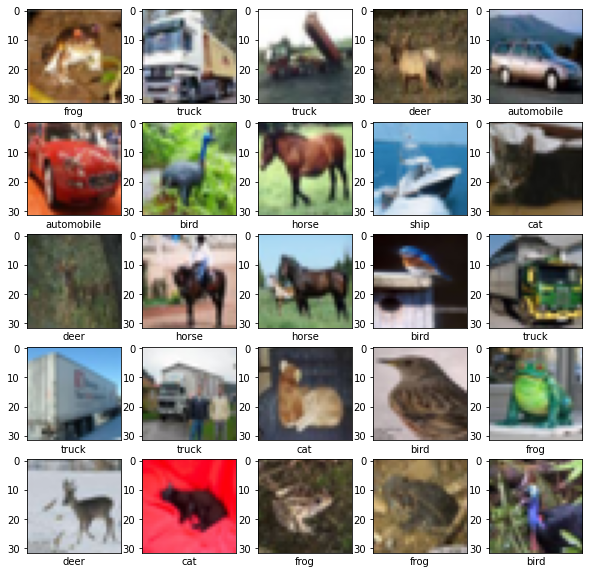

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # given

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) # Get or set the current tick locations and labels of the x-axis. Pass no arguments to return the current values without modifying them.
    # plt.yticks([])
    plt.grid(False) # Configure the grid lines.
    plt.imshow(train_img[i,:,:])
    plt.xlabel(class_names[train_label[i][0]]) # Set the label for the x-axis.
plt.show()

In [8]:
# create validation set
train_img, valid_img, train_label, valid_label = train_test_split(train_img, train_label, test_size=0.2, random_state=42)
train_img.shape, valid_img.shape, train_label.shape, valid_label.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

In [9]:
# create the model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2,2),padding='same'))
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

2021-10-20 16:08:24.037225: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-20 16:08:24.040263: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-20 16:08:24.043293: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [11]:
# train the model: train and validation sets comparison
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
train_valid_model = model.fit(train_img, train_label, batch_size=64, epochs=20, verbose=1, validation_data=(valid_img,valid_label))

2021-10-20 16:08:30.999479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-20 16:08:31.005394: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2894460000 Hz


Epoch 1/20
625/625 [==============================] - 79s 125ms/step - loss: 1.7539 - accuracy: 0.3516 - val_loss: 1.1568 - val_accuracy: 0.5886
Epoch 2/20
625/625 [==============================] - 75s 121ms/step - loss: 1.1140 - accuracy: 0.6044 - val_loss: 0.9776 - val_accuracy: 0.6554
Epoch 3/20
625/625 [==============================] - 80s 127ms/step - loss: 0.9172 - accuracy: 0.6775 - val_loss: 0.9216 - val_accuracy: 0.6771
Epoch 4/20
625/625 [==============================] - 77s 123ms/step - loss: 0.7891 - accuracy: 0.7228 - val_loss: 0.8215 - val_accuracy: 0.7111
Epoch 5/20
625/625 [==============================] - 71s 114ms/step - loss: 0.6755 - accuracy: 0.7639 - val_loss: 0.8073 - val_accuracy: 0.7209
Epoch 6/20
625/625 [==============================] - 83s 133ms/step - loss: 0.5872 - accuracy: 0.7940 - val_loss: 0.8556 - val_accuracy: 0.7144
Epoch 7/20
625/625 [==============================] - 80s 129ms/step - loss: 0.5110 - accuracy: 0.8209 - val_loss: 0.8644 - val_ac

<Figure size 432x288 with 0 Axes>

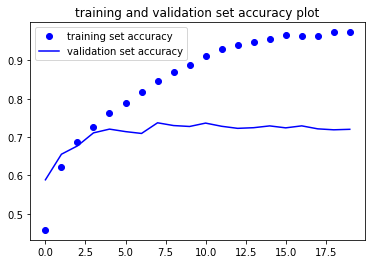

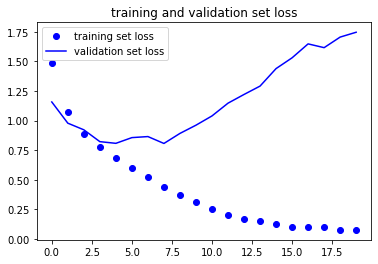

<Figure size 432x288 with 0 Axes>

In [16]:
train_acc = train_valid_model.history['accuracy']
train_loss = train_valid_model.history['loss']
valid_acc = train_valid_model.history['val_accuracy']
valid_loss = train_valid_model.history['val_loss']
plt.plot(range(20),train_acc,'bo',label='training set accuracy')
plt.plot(range(20),valid_acc,'b',label='validation set accuracy')
plt.title('training and validation set accuracy plot')
plt.legend()
plt.figure()

plt.plot(range(20),train_loss,'bo',label='training set loss')
plt.plot(range(20),valid_loss,'b',label='validation set loss')
plt.title('training and validation set loss')
plt.legend()
plt.figure()

In [17]:
# adding dropout to reduce overfitting
new_model = models.Sequential()
new_model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
new_model.add(layers.MaxPooling2D((2,2),padding='same'))
new_model.add(layers.Dropout(0.25))
new_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
new_model.add(layers.MaxPooling2D((2,2),padding='same'))
new_model.add(layers.Dropout(0.25))
new_model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
new_model.add(layers.Dropout(0.3))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(64,activation='relu'))
new_model.add(layers.Dropout(0.3))
new_model.add(layers.Dense(10))

In [18]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [19]:
new_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [20]:
new_train_valid_model = new_model.fit(train_img, train_label, batch_size=64, epochs=20, verbose=1, validation_data=(valid_img,valid_label))

Epoch 1/20
625/625 [==============================] - 72s 113ms/step - loss: 1.9622 - accuracy: 0.2651 - val_loss: 1.3638 - val_accuracy: 0.5080
Epoch 2/20
625/625 [==============================] - 78s 125ms/step - loss: 1.4304 - accuracy: 0.4851 - val_loss: 1.2391 - val_accuracy: 0.5449
Epoch 3/20
625/625 [==============================] - 84s 135ms/step - loss: 1.2622 - accuracy: 0.5520 - val_loss: 1.1154 - val_accuracy: 0.5978
Epoch 4/20
625/625 [==============================] - 80s 128ms/step - loss: 1.1642 - accuracy: 0.5860 - val_loss: 0.9884 - val_accuracy: 0.6389
Epoch 5/20
625/625 [==============================] - 81s 130ms/step - loss: 1.0917 - accuracy: 0.6132 - val_loss: 0.9301 - val_accuracy: 0.6703
Epoch 6/20
625/625 [==============================] - 93s 148ms/step - loss: 1.0143 - accuracy: 0.6416 - val_loss: 0.9436 - val_accuracy: 0.6667
Epoch 7/20
625/625 [==============================] - 81s 129ms/step - loss: 0.9782 - accuracy: 0.6543 - val_loss: 0.8751 - val_ac

<Figure size 432x288 with 0 Axes>

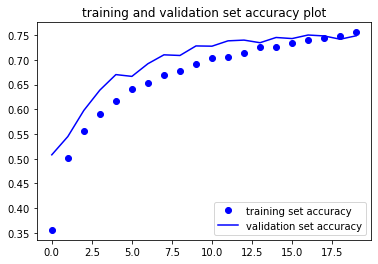

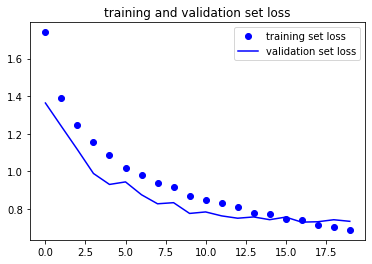

<Figure size 432x288 with 0 Axes>

In [22]:
train_acc = new_train_valid_model.history['accuracy']
train_loss = new_train_valid_model.history['loss']
valid_acc = new_train_valid_model.history['val_accuracy']
valid_loss = new_train_valid_model.history['val_loss']
plt.plot(range(20),train_acc,'bo',label='training set accuracy')
plt.plot(range(20),valid_acc,'b',label='validation set accuracy')
plt.title('training and validation set accuracy plot')
plt.legend()
plt.figure()

plt.plot(range(20),train_loss,'bo',label='training set loss')
plt.plot(range(20),valid_loss,'b',label='validation set loss')
plt.title('training and validation set loss')
plt.legend()
plt.figure()

In [23]:
# save the model so that you can directly load it and not have to train it again for 20 epochs.
new_model.save('new_train_valid_model.h5py')

2021-10-20 17:03:47.254293: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: new_train_valid_model.h5py/assets


In [46]:
# prediction on test set
predicted_class = new_model.predict(test_img)
predicted_class = np.argmax(predicted_class,axis=1)
predicted_class.shape, test_label.shape

((10000,), (10000, 1))

In [47]:
predicted_class = np.reshape(predicted_class,(10000,1))

In [51]:
predicted_class.shape
for i in range(10):
    print(predicted_class[i],test_label[i])

[3] [3]
[8] [8]
[8] [8]
[8] [0]
[6] [6]
[6] [6]
[1] [1]
[6] [6]
[3] [3]
[1] [1]


In [53]:
correct_class = []
for i in range(10000):
    if predicted_class[i] == test_label[i]:
        correct_class.append(predicted_class[i])
print("%d of test images are predicted correctly." % len(correct_class))

7430 of test images are predicted correctly.


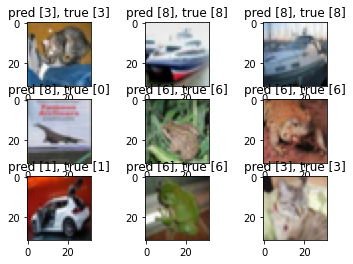

In [75]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_img[i])
    plt.title("pred {}, true {}".format(predicted_class[i],test_label[i]))
    #plt.tight_layout()

In [78]:
# classification report
target_names = ["class {}".format(i) for i in range(10)]
print(classification_report(test_label,predicted_class,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.78      0.69      0.73      1000
     class 1       0.89      0.83      0.86      1000
     class 2       0.64      0.59      0.62      1000
     class 3       0.60      0.54      0.57      1000
     class 4       0.71      0.69      0.70      1000
     class 5       0.67      0.65      0.66      1000
     class 6       0.78      0.84      0.81      1000
     class 7       0.80      0.81      0.81      1000
     class 8       0.78      0.90      0.83      1000
     class 9       0.76      0.88      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

